In [1]:
import os
import pandas as pd
import numpy as np
import wbdata
import plotly.express as px
from moviepy.editor import ImageSequenceClip

In [2]:
# indicators = {
#     "SP.POP.TOTL": "Total_Population",
#     "NY.GDP.PCAP.CD": "GDP_Per_Capita"
# }
#  Fetch data for all country:
# handling missing values:
# filter data for vaild year:
# ensure values missing:
# categorie "gdp-per-capita":
# define the categorice order and consisting color mapping:
# Choose a qualitative palette:
# map each categorie for specfic color
# director save frames:
# remove if already exists:
# save image as enough(./08_plotly)
# filter data from the current year:
# create dataframe all catog countrie year:
# combine all catog for the current year:
# filterofdf all catog for the current year:

In [3]:
# ===============================
# 🌍 Advanced World Bank Data Analysis & Plotly
# ===============================

import os
import pandas as pd
import numpy as np
import datetime
import wbdata
import plotly.express as px

# -------------------------------
# 🎯 Indicators
# -------------------------------
INDICATORS = {
    "SP.POP.TOTL": "Total_Population",
    "NY.GDP.PCAP.CD": "GDP_Per_Capita"
}

# -------------------------------
# 📅 Year Range
# -------------------------------
START_YEAR = 1969
END_YEAR = datetime.datetime.now().year - 1
CURRENT_YEAR = END_YEAR

# -------------------------------
# 📥 Fetch Data (optimized)
# -------------------------------
def fetch_wb_data(indicators, start_year=START_YEAR, end_year=END_YEAR):
    df = wbdata.get_dataframe(indicators).reset_index()
    df.columns = ["Country", "Date", "Total_Population", "GDP_Per_Capita"]
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df.drop(columns="Date", inplace=True)
    
    # Convert numeric
    df["Total_Population"] = pd.to_numeric(df["Total_Population"], errors="coerce", downcast="float")
    df["GDP_Per_Capita"] = pd.to_numeric(df["GDP_Per_Capita"], errors="coerce", downcast="float")
    
    # Remove rows where both missing
    df = df.dropna(subset=["Total_Population", "GDP_Per_Capita"], how="all")
    df = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    
    return df

df = fetch_wb_data(INDICATORS)

# -------------------------------
# 💰 GDP Per Capita Categories
# -------------------------------
def assign_gdp_category(value):
    if pd.isna(value):
        return "Unknown"
    elif value < 1085:
        return "Low Income"
    elif value < 4255:
        return "Lower-Middle Income"
    elif value < 13205:
        return "Upper-Middle Income"
    else:
        return "High Income"

df["GDP_Category"] = df["GDP_Per_Capita"].apply(assign_gdp_category)

CATEGORY_ORDER = ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income", "Unknown"]
COLOR_MAP = {
    "Low Income": "#d73027",
    "Lower-Middle Income": "#fc8d59",
    "Upper-Middle Income": "#fee08b",
    "High Income": "#1a9850",
    "Unknown": "#aaaaaa"
}

# -------------------------------
# 📁 Save Directory
# -------------------------------
SAVE_DIR = "./08_plotly"
os.makedirs(SAVE_DIR, exist_ok=True)

# -------------------------------
# 📆 Filter Current Year
# -------------------------------
df_current = df[df["Year"] == CURRENT_YEAR].copy()

# -------------------------------
# 📊 Aggregate Data for Plot
# -------------------------------
df_plot = (
    df_current
    .groupby("GDP_Category")
    .agg(
        Countries=("Country", "count"),
        Avg_GDP=("GDP_Per_Capita", "mean"),
        Total_Population=("Total_Population", "sum")
    )
    .reset_index()
)

df_plot["GDP_Category"] = pd.Categorical(df_plot["GDP_Category"], categories=CATEGORY_ORDER, ordered=True)
df_plot.sort_values("GDP_Category", inplace=True)

# -------------------------------
# 📈 Plot Advanced Bar Chart
# -------------------------------
fig = px.bar(
    df_plot,
    x="GDP_Category",
    y="Countries",
    color="GDP_Category",
    color_discrete_map=COLOR_MAP,
    title=f"🌍 Countries by Income Group ({CURRENT_YEAR})",
    text="Countries",
    hover_data={
        "Avg_GDP": ":.2f",
        "Total_Population": ":,.0f"
    }
)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Income Group",
    yaxis_title="Number of Countries",
    showlegend=False
)

# -------------------------------
# 💾 Save Outputs
# -------------------------------
file_path = os.path.join(SAVE_DIR, f"countries_by_income_{CURRENT_YEAR}.png")
fig.write_image(file_path, scale=3)
fig.write_html(os.path.join(SAVE_DIR, f"countries_by_income_{CURRENT_YEAR}.html"))

fig.show()
print(f"✅ Saved PNG: {file_path}")
print(f"✅ Saved HTML: {os.path.join(SAVE_DIR, f'countries_by_income_{CURRENT_YEAR}.html')}")


✅ Saved PNG: ./08_plotly\countries_by_income_2025.png
✅ Saved HTML: ./08_plotly\countries_by_income_2025.html


In [4]:
# ===============================
# 🌍 Choropleth Map by GDP Category
# ===============================

import pandas as pd
import datetime
import wbdata
import plotly.express as px

# -------------------------------
# 🎯 Indicators
# -------------------------------
indicators = {
    "NY.GDP.PCAP.CD": "GDP_Per_Capita"
}

# -------------------------------
# 📅 Year Settings
# -------------------------------
START_YEAR = 1969
END_YEAR = datetime.datetime.now().year - 1
CURRENT_YEAR = END_YEAR

# -------------------------------
# 📥 Fetch Data
# -------------------------------
df = wbdata.get_dataframe(indicators).reset_index()

# Rename columns
df.columns = ["Country", "Date", "GDP_Per_Capita"]

# Ensure 'Date' is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract Year
df["Year"] = df["Date"].dt.year
df.drop(columns="Date", inplace=True)

# -------------------------------
# 🧹 Handle Missing Values
# -------------------------------
df["GDP_Per_Capita"] = pd.to_numeric(df["GDP_Per_Capita"], errors="coerce")
df = df.dropna(subset=["GDP_Per_Capita"])

# -------------------------------
# 📌 Filter Current Year
# -------------------------------
df_current = df[df["Year"] == CURRENT_YEAR].copy()

# -------------------------------
# 💰 GDP Per Capita Categories
# -------------------------------
def gdp_category(value):
    if value < 1085:
        return "Low Income"
    elif value < 4255:
        return "Lower-Middle Income"
    elif value < 13205:
        return "Upper-Middle Income"
    else:
        return "High Income"

df_current["GDP_Category"] = df_current["GDP_Per_Capita"].apply(gdp_category)

# -------------------------------
# 🎨 Colors
# -------------------------------
color_map = {
    "Low Income": "#d73027",
    "Lower-Middle Income": "#fc8d59",
    "Upper-Middle Income": "#fee08b",
    "High Income": "#1a9850"
}

# -------------------------------
# 🌐 Choropleth Map
# -------------------------------
fig = px.choropleth(
    df_current,
    locations="Country",
    locationmode="country names",
    color="GDP_Category",
    category_orders={
        "GDP_Category": ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]
    },
    color_discrete_map=color_map,
    title=f"🌍 World GDP per Capita Categories ({CURRENT_YEAR})"
)

fig.update_layout(
    template="plotly_dark",
    legend_title_text="Income Group"
)

fig.show()



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




In [5]:
# ===============================
# 🌍 Advanced Choropleth Map: GDP Categories
# ===============================

import pandas as pd
import datetime
import wbdata
import plotly.express as px

# -------------------------------
# 🎯 Indicators
# -------------------------------
indicators = {
    "NY.GDP.PCAP.CD": "GDP_Per_Capita"
}

# -------------------------------
# 📅 Year Settings
# -------------------------------
START_YEAR = 1969
END_YEAR = datetime.datetime.now().year - 1
CURRENT_YEAR = END_YEAR

# -------------------------------
# 📥 Fetch Data from World Bank
# -------------------------------
try:
    df = wbdata.get_dataframe(indicators, convert_date=True).reset_index()
except Exception as e:
    print("Error fetching data:", e)
    df = pd.DataFrame(columns=["country", "date", "GDP_Per_Capita"])

# -------------------------------
# 🧹 Clean Data
# -------------------------------
df.columns = ["Country", "Date", "GDP_Per_Capita"]
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df.drop(columns="Date", inplace=True)
df["GDP_Per_Capita"] = pd.to_numeric(df["GDP_Per_Capita"], errors="coerce")
df = df.dropna(subset=["GDP_Per_Capita"])

# -------------------------------
# 🗺️ Get ISO-3 Codes for Better Mapping
# -------------------------------
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df["ISO3"] = df["Country"].apply(get_iso3)
df = df.dropna(subset=["ISO3"])

# -------------------------------
# 💰 GDP Categories Function
# -------------------------------
def gdp_category(value):
    if value < 1085:
        return "Low Income"
    elif value < 4255:
        return "Lower-Middle Income"
    elif value < 13205:
        return "Upper-Middle Income"
    else:
        return "High Income"

df["GDP_Category"] = df["GDP_Per_Capita"].apply(gdp_category)

# -------------------------------
# 🎨 Colors
# -------------------------------
color_map = {
    "Low Income": "#d73027",
    "Lower-Middle Income": "#fc8d59",
    "Upper-Middle Income": "#fee08b",
    "High Income": "#1a9850"
}

# -------------------------------
# 📌 Filter for Current Year (Optional: Animation)
# -------------------------------
df_current = df[df["Year"] == CURRENT_YEAR].copy()

# -------------------------------
# 🌐 Choropleth Map
# -------------------------------
fig = px.choropleth(
    df_current,
    locations="ISO3",
    color="GDP_Category",
    hover_name="Country",
    hover_data={"GDP_Per_Capita": True, "GDP_Category": True, "ISO3": False},
    color_discrete_map=color_map,
    category_orders={"GDP_Category": ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]},
    title=f"🌍 World GDP per Capita Categories ({CURRENT_YEAR})"
)

# -------------------------------
# 🖌 Layout Customization
# -------------------------------
fig.update_layout(
    template="plotly_dark",
    geo=dict(showframe=False, showcoastlines=True),
    legend_title_text="Income Group",
    title_x=0.5
)

# Highlight missing countries in grey
fig.update_traces(marker_line_width=0.5, marker_line_color='black')

fig.show()


Error fetching data: got an unexpected keyword argument 'convert_date'


In [6]:
# 🌐 Choropleth Map(gdp):
# borders adjust:
# adjust figure layout:
# size of image:
# increase the font size of the title and legend
# add text annotation of the source
# save image(./08_plotly):kaleido
# collect image file path
# frame per sec:2
# clip of image sequence:
# dir of save video:
# save as mp4:
# save with high bitrate:
# create clip of image sequence:
# gif file create and save as gif:
# display output(gif file if running a notebook):
# %%time
# add copyright claim:iamuser(RammaBhai)


The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country na

✅ Total images saved: 56
Moviepy - Building video ./08_plotly/video/gdp_world_2025.mp4.
Moviepy - Writing video ./08_plotly/video/gdp_world_2025.mp4



Moviepy - Done !
Moviepy - video ready ./08_plotly/video/gdp_world_2025.mp4
MoviePy - Building file ./08_plotly/gif/gdp_world_2025.gif with imageio.


✅ Video saved: ./08_plotly/video/gdp_world_2025.mp4
✅ GIF saved: ./08_plotly/gif/gdp_world_2025.gif


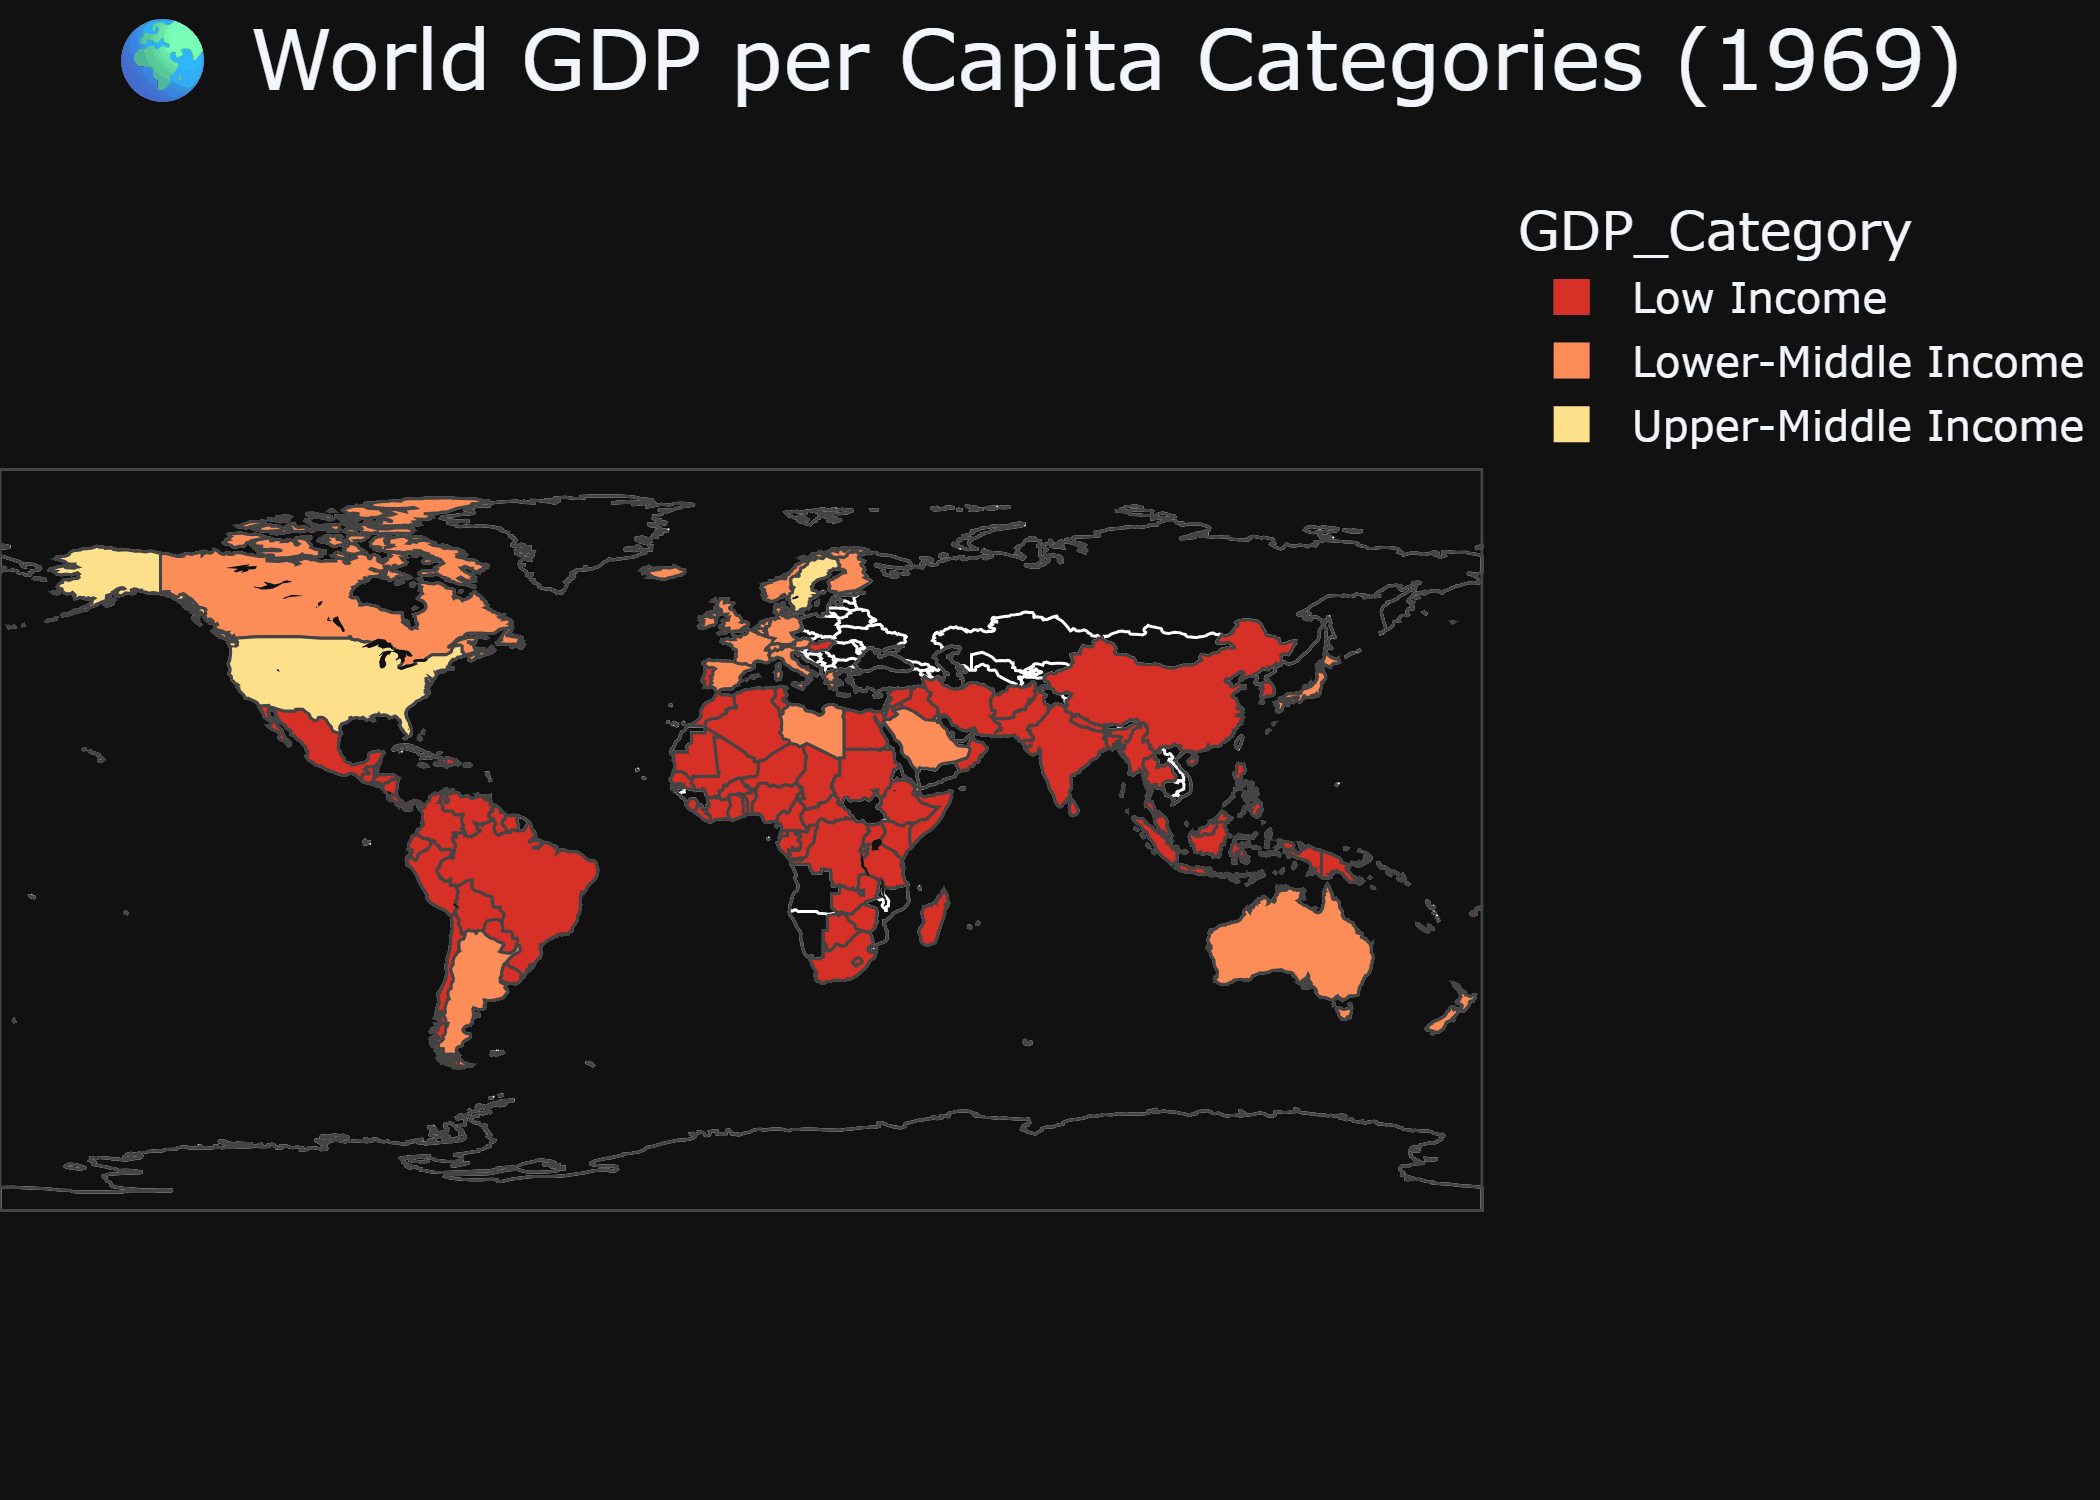

✅ Workflow complete | © iamuser (RammaBhai)


In [7]:
# =====================================================
# 🌐 Choropleth Map (GDP Categories) → Images → Video → GIF
# =====================================================

import os
import pandas as pd
import datetime
import wbdata
import plotly.express as px
import plotly.graph_objects as go
from moviepy.editor import ImageSequenceClip
from PIL import Image

# -------------------------------
# 🎯 Indicators
# -------------------------------
indicators = {"NY.GDP.PCAP.CD": "GDP_Per_Capita"}

# -------------------------------
# 📅 Year Settings
# -------------------------------
START_YEAR = 1969
END_YEAR = datetime.datetime.now().year - 1
CURRENT_YEAR = END_YEAR

# -------------------------------
# 📥 Fetch Data
# -------------------------------
df = wbdata.get_dataframe(indicators).reset_index()
df.columns = ["Country", "Date", "GDP_Per_Capita"]
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df.drop(columns="Date", inplace=True)
df["GDP_Per_Capita"] = pd.to_numeric(df["GDP_Per_Capita"], errors="coerce")
df = df.dropna(subset=["GDP_Per_Capita"])

# -------------------------------
# 💰 GDP Per Capita Categories
# -------------------------------
def gdp_category(value):
    if value < 1085:
        return "Low Income"
    elif value < 4255:
        return "Lower-Middle Income"
    elif value < 13205:
        return "Upper-Middle Income"
    else:
        return "High Income"

df["GDP_Category"] = df["GDP_Per_Capita"].apply(gdp_category)

# -------------------------------
# 🎨 Colors & Category Order
# -------------------------------
category_order = ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]
color_map = {
    "Low Income": "#d73027",
    "Lower-Middle Income": "#fc8d59",
    "Upper-Middle Income": "#fee08b",
    "High Income": "#1a9850"
}

# -------------------------------
# 📁 Directories
# -------------------------------
IMAGE_DIR = "./08_plotly/images"
VIDEO_DIR = "./08_plotly/video"
GIF_DIR = "./08_plotly/gif"

os.makedirs(IMAGE_DIR, exist_ok=True)
os.makedirs(VIDEO_DIR, exist_ok=True)
os.makedirs(GIF_DIR, exist_ok=True)

# -------------------------------
# ⏱ Create Images per Year
# -------------------------------
image_paths = []
for year in range(START_YEAR, END_YEAR + 1):
    df_year = df[df["Year"] == year].copy()
    
    if df_year.empty:
        continue
    
    fig = px.choropleth(
        df_year,
        locations="Country",
        locationmode="country names",
        color="GDP_Category",
        category_orders={"GDP_Category": category_order},
        color_discrete_map=color_map,
        title=f"🌍 World GDP per Capita Categories ({year})",
        hover_name="Country"
    )
    
    # Borders and layout adjustments
    fig.update_geos(showcountries=True, countrycolor="white", showcoastlines=True)
    fig.update_layout(
        template="plotly_dark",
        title_font_size=28,
        legend_title_font_size=18,
        font=dict(size=14),
        margin=dict(l=0, r=0, t=60, b=0)
    )
    
    # Add text annotation for source and copyright
    fig.add_annotation(
        text="Source: World Bank | © iamuser (RammaBhai)",
        xref="paper", yref="paper",
        x=0.5, y=-0.05, showarrow=False,
        font=dict(size=12, color="lightgray"),
        align="center"
    )
    
    # Save figure as high-resolution PNG
    file_path = f"{IMAGE_DIR}/gdp_{year}.png"
    fig.write_image(file_path, scale=3)  # requires kaleido
    image_paths.append(file_path)

print(f"✅ Total images saved: {len(image_paths)}")

# -------------------------------
# 🎬 Create Video Clip from Images
# -------------------------------
clip = ImageSequenceClip(image_paths, fps=2)  # 2 frames/sec
video_file = f"{VIDEO_DIR}/gdp_world_{CURRENT_YEAR}.mp4"
clip.write_videofile(video_file, codec="libx264", bitrate="5000k")

# -------------------------------
# 🎞 Create GIF
# -------------------------------
gif_file = f"{GIF_DIR}/gdp_world_{CURRENT_YEAR}.gif"
clip.write_gif(gif_file, fps=2)

print(f"✅ Video saved: {video_file}")
print(f"✅ GIF saved: {gif_file}")

# -------------------------------
# 📌 Display GIF in notebook (if running in Jupyter)
# -------------------------------
try:
    from IPython.display import Image as IPImage, display
    display(IPImage(filename=gif_file))
except:
    pass

# -------------------------------
# ⏱ End Time
# -------------------------------
print("✅ Workflow complete | © iamuser (RammaBhai)")



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The library used by the *country na

✅ Total images saved: 56
Moviepy - Building video ./08_plotly/video/gdp_world_2025.mp4.
Moviepy - Writing video ./08_plotly/video/gdp_world_2025.mp4



Moviepy - Done !
Moviepy - video ready ./08_plotly/video/gdp_world_2025.mp4
MoviePy - Building file ./08_plotly/gif/gdp_world_2025.gif with imageio.


✅ Video saved: ./08_plotly/video/gdp_world_2025.mp4
✅ GIF saved: ./08_plotly/gif/gdp_world_2025.gif


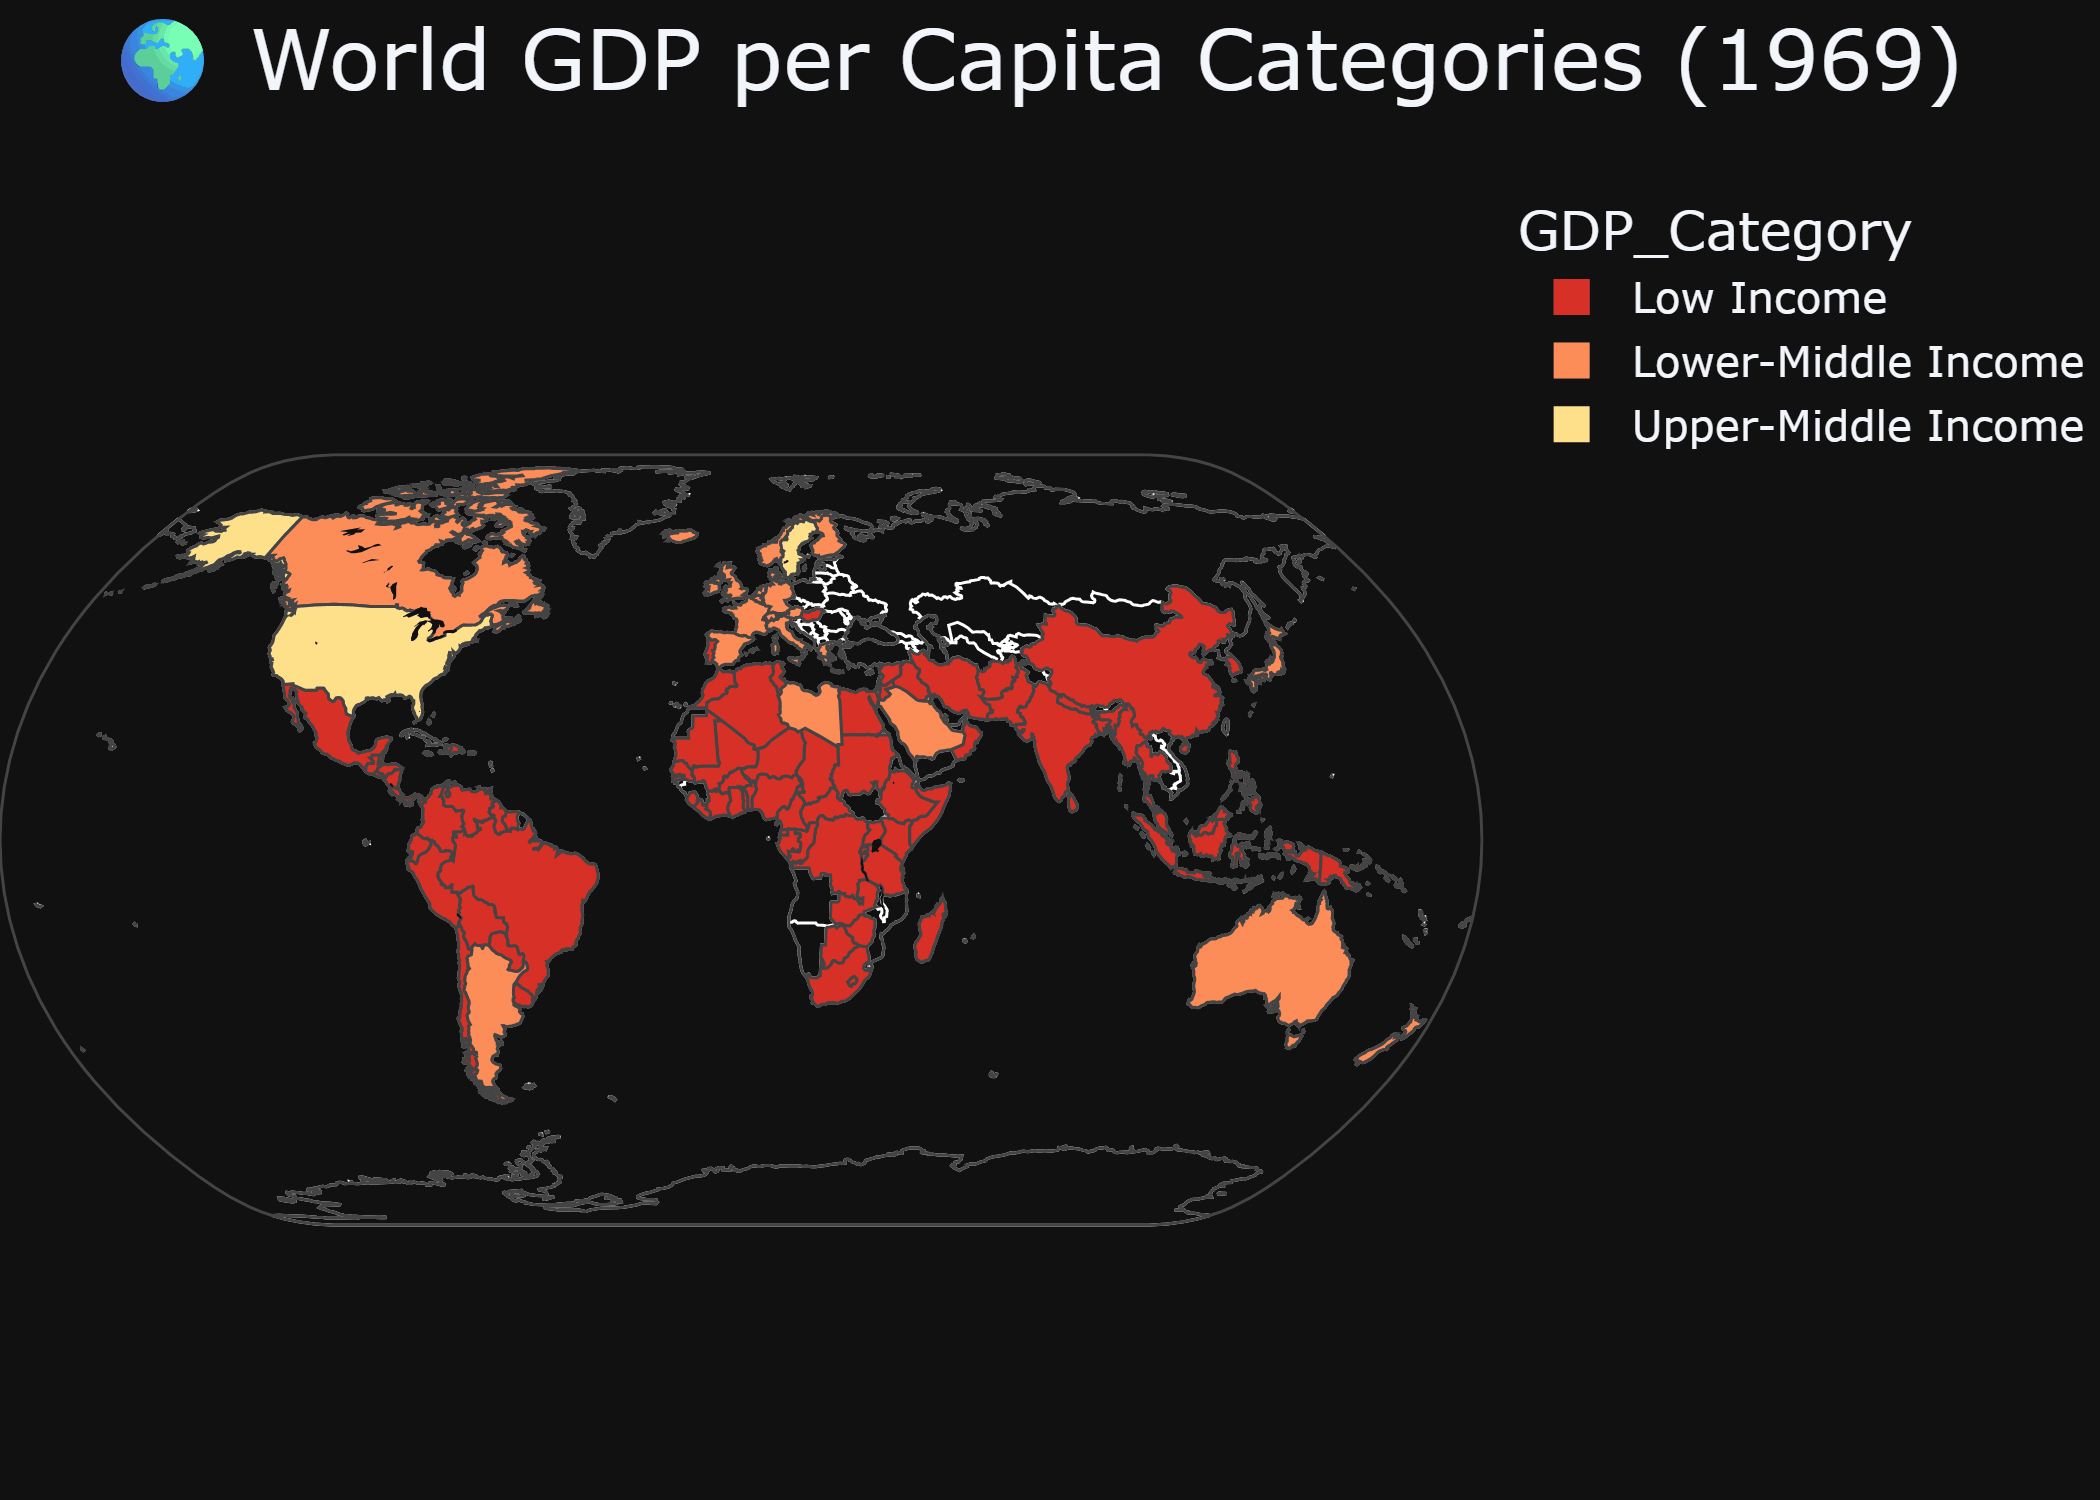

✅ Workflow complete | © iamuser (RammaBhai)


In [8]:
# =====================================================
# 🌐 Advanced Choropleth Map (GDP Categories) → Images → Video → GIF
# =====================================================

import os
import pandas as pd
import datetime
import wbdata
import plotly.express as px
from moviepy.editor import ImageSequenceClip
from IPython.display import Image as IPImage, display

# -------------------------------
# 🎯 Parameters
# -------------------------------
INDICATORS = {"NY.GDP.PCAP.CD": "GDP_Per_Capita"}
START_YEAR = 1969
END_YEAR = datetime.datetime.now().year - 1
CURRENT_YEAR = END_YEAR
FPS = 2
VIDEO_BITRATE = "5000k"

# -------------------------------
# 📁 Directories
# -------------------------------
BASE_DIR = "./08_plotly"
IMAGE_DIR = f"{BASE_DIR}/images"
VIDEO_DIR = f"{BASE_DIR}/video"
GIF_DIR = f"{BASE_DIR}/gif"

for d in [IMAGE_DIR, VIDEO_DIR, GIF_DIR]:
    os.makedirs(d, exist_ok=True)

# -------------------------------
# 💰 GDP Categories
# -------------------------------
GDP_THRESHOLDS = [1085, 4255, 13205]
GDP_LABELS = ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]
COLOR_MAP = {
    "Low Income": "#d73027",
    "Lower-Middle Income": "#fc8d59",
    "Upper-Middle Income": "#fee08b",
    "High Income": "#1a9850"
}

def categorize_gdp(value):
    if value < GDP_THRESHOLDS[0]:
        return GDP_LABELS[0]
    elif value < GDP_THRESHOLDS[1]:
        return GDP_LABELS[1]
    elif value < GDP_THRESHOLDS[2]:
        return GDP_LABELS[2]
    else:
        return GDP_LABELS[3]

# -------------------------------
# 📥 Fetch & Clean Data
# -------------------------------
df = wbdata.get_dataframe(INDICATORS).reset_index()
df.columns = ["Country", "Date", "GDP_Per_Capita"]
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["GDP_Per_Capita"] = pd.to_numeric(df["GDP_Per_Capita"], errors="coerce")
df.drop(columns="Date", inplace=True)
df.dropna(subset=["GDP_Per_Capita"], inplace=True)
df["GDP_Category"] = df["GDP_Per_Capita"].apply(categorize_gdp)

# -------------------------------
# ⏱ Generate Images per Year
# -------------------------------
image_paths = []

for year in range(START_YEAR, END_YEAR + 1):
    df_year = df[df["Year"] == year]
    if df_year.empty:
        continue
    
    fig = px.choropleth(
        df_year,
        locations="Country",
        locationmode="country names",
        color="GDP_Category",
        category_orders={"GDP_Category": GDP_LABELS},
        color_discrete_map=COLOR_MAP,
        title=f"🌍 World GDP per Capita Categories ({year})",
        hover_name="Country",
        hover_data={"GDP_Per_Capita": True, "GDP_Category": True},
        projection="natural earth"
    )
    
    # Borders and layout
    fig.update_geos(showcountries=True, countrycolor="white", showcoastlines=True)
    fig.update_layout(
        template="plotly_dark",
        title_font_size=28,
        legend_title_font_size=18,
        font=dict(size=14),
        margin=dict(l=0, r=0, t=60, b=0)
    )
    
    # Add annotation for source
    fig.add_annotation(
        text="Source: World Bank | © iamuser (RammaBhai)",
        xref="paper", yref="paper",
        x=0.5, y=-0.05, showarrow=False,
        font=dict(size=12, color="lightgray"),
        align="center"
    )
    
    # Save high-resolution PNG
    file_path = f"{IMAGE_DIR}/gdp_{year}.png"
    fig.write_image(file_path, scale=3)
    image_paths.append(file_path)

print(f"✅ Total images saved: {len(image_paths)}")

# -------------------------------
# 🎬 Create Video & GIF
# -------------------------------
clip = ImageSequenceClip(image_paths, fps=FPS)
video_file = f"{VIDEO_DIR}/gdp_world_{CURRENT_YEAR}.mp4"
clip.write_videofile(video_file, codec="libx264", bitrate=VIDEO_BITRATE)

gif_file = f"{GIF_DIR}/gdp_world_{CURRENT_YEAR}.gif"
clip.write_gif(gif_file, fps=FPS)

print(f"✅ Video saved: {video_file}")
print(f"✅ GIF saved: {gif_file}")

# -------------------------------
# 📌 Display GIF in Notebook
# -------------------------------
try:
    display(IPImage(filename=gif_file))
except:
    pass

print("✅ Workflow complete | © iamuser (RammaBhai)")
